In [1]:
# Import required libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import kagglehub

# Download the CelebA dataset using kagglehub
jessicali9530_celeba_dataset_path = kagglehub.dataset_download('jessicali9530/celeba-dataset')
print('Data source import complete.')

# Importing scikit-learn tools for splitting and evaluating the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importing TensorFlow and Keras tools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D

# Print confirmation
print('Libraries imported successfully.')


100%|██████████| 1.33G/1.33G [00:20<00:00, 69.2MB/s]

Extracting files...


Data source import complete.
Libraries imported successfully.


In [2]:
BASIC_PATH = "/kaggle/input/celeba-dataset"
IMG_PATH = os.path.join(BASIC_PATH,'img_align_celeba/img_align_celeba')
FEATURE_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')

In [3]:
BASIC_PATH = jessicali9530_celeba_dataset_path
IMG_PATH = os.path.join(BASIC_PATH,'img_align_celeba/img_align_celeba')
FEATURE_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')


In [4]:
LIST_ATTR_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')
DF_ATTR = pd.read_csv(BASIC_PATH + '/list_attr_celeba.csv', delimiter=',')
print(IMG_PATH, LIST_ATTR_PATH)
DF_ATTR.head()

/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [5]:
DF_PARTITION = pd.read_csv(BASIC_PATH + '/list_eval_partition.csv')

In [6]:
DF_ATTR.set_index('image_id', inplace=True)
DF_ATTR.replace(to_replace=-1, value=0, inplace=True)
DF_ATTR.shape

(202599, 40)

In [7]:
DF_PARTITION['partition'].value_counts().sort_index()

,count
partition,
0,162770
1,19867
2,19962


In [8]:
# prompt: hitung dan tampilkan jumlah total dataset diatas

total_dataset = DF_ATTR.shape[0]
print(f"Total dataset: {total_dataset}")

Total dataset: 202599


Contoh file duplikat:
Total file duplikat: 0


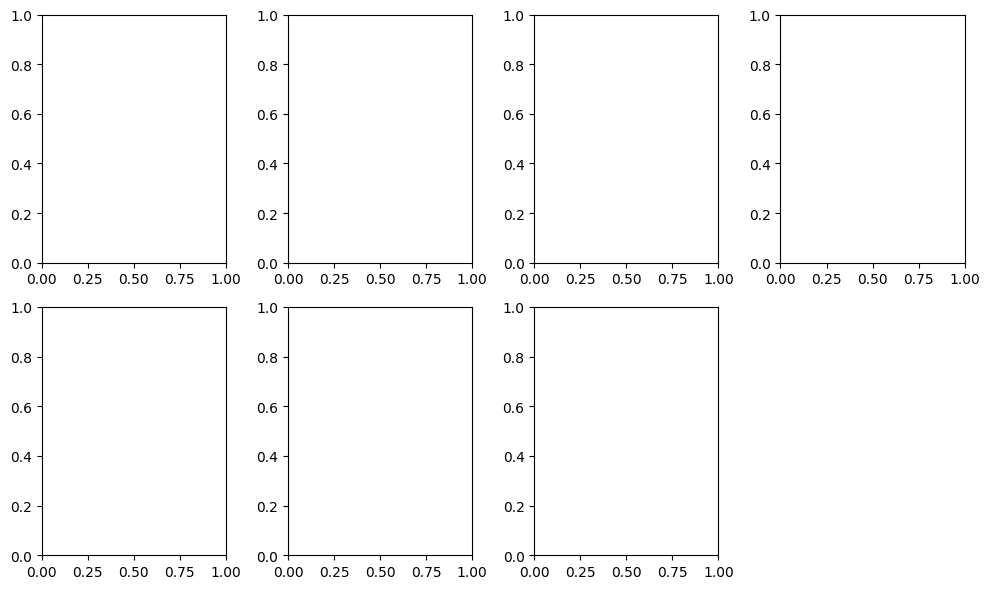

In [11]:
# Mengecek File Duplikat, Menghitung Jumlahnya dan Menampilkan 5 File Contoh
import os
import hashlib
import matplotlib.pyplot as plt
# Library yang digunakan : os dan hashlib

# Mencari semua file dengan ekstensi gambar dalam folder
image_files = [file for file in os.listdir(IMG_PATH) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Menggunakan dictionary untuk menyimpan hash nilai dan daftar file dengan hash yang sama
duplicate_files = {}

# Memeriksa setiap file gambar
for file_name in image_files:
    file_path = os.path.join(IMG_PATH, file_name)
    with open(file_path, 'rb') as f:
        file_hash = hashlib.md5(f.read()).hexdigest()

    if file_hash not in duplicate_files:
        duplicate_files[file_hash] = [file_name]
    else:
        duplicate_files[file_hash].append(file_name)

# Menghitung total file yang duplikat
total_duplicate_files = sum(len(files) - 1 for files in duplicate_files.values())

# Menampilkan 8 contoh nama file yang duplikat
print("Contoh file duplikat:")
count = 0
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        for file_name in file_list[:8]:
            count += 1
            print(file_name)
            if count == 8:
                break
    if count == 8:
        break

# Menampilkan total file yang duplikat
print(f"Total file duplikat: {total_duplicate_files}")

# Mengumpulkan 8 contoh file duplikat sebelum menghapus file duplikat
duplicate_examples = []
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        duplicate_examples.extend(file_list[:8])  # Ambil contoh sebelum file dihapus
    if len(duplicate_examples) >= 10:
        break

# Menghapus file duplikat kecuali satu
for files in duplicate_files.values():
    if len(files) > 1:
        for file in files[1:]:
            os.remove(os.path.join(IMG_PATH, file))

# Menampilkan 8 foto duplikat dengan judul sebagai nama file
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(duplicate_examples):
        file_name = duplicate_examples[i]
        file_path = os.path.join(IMG_PATH, file_name)
        # Periksa apakah file masih ada sebelum mencoba membacanya
        if os.path.exists(file_path):
            image = plt.imread(file_path)
            ax.imshow(image)
            ax.set_title(file_name)
            plt.suptitle('Contoh Foto Duplikat')
        else:
            print(f"File {file_name} tidak ditemukan, tidak dapat ditampilkan.")
else:
        ax.axis('off') # Indented to indicate it's part of the else block

plt.tight_layout()
plt.show()


In [12]:
# Membuat List Nama File Foto untuk Join dengan Nama File pada File list_attribute.csv
import glob
# Library yang digunakan : glob dan pandas

# Tentukan pola nama file foto (misal: JPEG, PNG)
file_ekstensi = '*.jpg' # Ganti dengan ekstensi file gambar yang sesuai

# Tentukan direktori tempat file-file gambar berada
direktori_foto = IMG_PATH

# Mendapatkan list nama file
nama_file = glob.glob(direktori_foto + '/' + file_ekstensi)

# List nama file dijadikan dataframe
data = pd.DataFrame(nama_file, columns = ['image_id'])

# Menampilkan dataframe
data.head()


,image_id
0,/root/.cache/kagglehub/datasets/jessicali9530/...
1,/root/.cache/kagglehub/datasets/jessicali9530/...
2,/root/.cache/kagglehub/datasets/jessicali9530/...
3,/root/.cache/kagglehub/datasets/jessicali9530/...
4,/root/.cache/kagglehub/datasets/jessicali9530/...


In [13]:
# Membuang karakter pertama hingga sebelum nama file
data['image_id'] = data['image_id'].str.split('\\').str[-1]
data.head()

,image_id
0,/root/.cache/kagglehub/datasets/jessicali9530/...
1,/root/.cache/kagglehub/datasets/jessicali9530/...
2,/root/.cache/kagglehub/datasets/jessicali9530/...
3,/root/.cache/kagglehub/datasets/jessicali9530/...
4,/root/.cache/kagglehub/datasets/jessicali9530/...


In [14]:
# Load Dataset 'list_attribute.csv' tampilkan juga nama file

print(f"File yang digunakan: {LIST_ATTR_PATH}")
df_attr = pd.read_csv(LIST_ATTR_PATH)
df_attr.head()

File yang digunakan: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [15]:
# prompt: # Cek Informasi pada DataFrame

# Cek Informasi pada DataFrame DF_ATTR
print("Informasi DataFrame DF_ATTR:")
print(DF_ATTR.info())
print("\n")

# Cek Informasi pada DataFrame DF_PARTITION
print("Informasi DataFrame DF_PARTITION:")
print(DF_PARTITION.info())
print("\n")

# Deskripsi statistik DF_ATTR
print("Deskripsi Statistik DF_ATTR:")
print(DF_ATTR.describe())
print("\n")

# Melihat jumlah data missing per kolom
print("Jumlah Data Missing per Kolom DF_ATTR:")
print(DF_ATTR.isnull().sum())
print("\n")

# Melihat jumlah data missing per kolom
print("Jumlah Data Missing per Kolom DF_PARTITION:")
print(DF_PARTITION.isnull().sum())
print("\n")

# Melihat korelasi antar kolom pada DF_ATTR
print("Korelasi Antar Kolom DF_ATTR:")
print(DF_ATTR.corr())
print("\n")

# Melihat nilai unik pada kolom 'partition' di DF_PARTITION
print("Nilai Unik pada Kolom 'partition' di DF_PARTITION:")
print(DF_PARTITION['partition'].unique())
print("\n")

Informasi DataFrame DF_ATTR:
<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   5_o_Clock_Shadow     202599 non-null  int64
 1   Arched_Eyebrows      202599 non-null  int64
 2   Attractive           202599 non-null  int64
 3   Bags_Under_Eyes      202599 non-null  int64
 4   Bald                 202599 non-null  int64
 5   Bangs                202599 non-null  int64
 6   Big_Lips             202599 non-null  int64
 7   Big_Nose             202599 non-null  int64
 8   Black_Hair           202599 non-null  int64
 9   Blond_Hair           202599 non-null  int64
 10  Blurry               202599 non-null  int64
 11  Brown_Hair           202599 non-null  int64
 12  Bushy_Eyebrows       202599 non-null  int64
 13  Chubby               202599 non-null  int64
 14  Double_Chin          202599 non-null  int64
 15  Eyeglasses    

In [16]:
# prompt: # Inner Join antara Objek 'data' dengan Objek 'list_attribute'

# Inner Join antara Objek 'data' dengan Objek 'list_attribute'

# Gabungkan 'data' dan 'DF_ATTR' berdasarkan 'image_id'
merged_data = pd.merge(data, DF_ATTR, left_on='image_id', right_index=True, how='inner')

# Tampilkan hasil penggabungan
print("Hasil Inner Join:")
merged_data.head()

Hasil Inner Join:


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young


In [17]:
# prompt: # Cek Jumlah Baris dan kolom yang telah Join Inner

# Cek jumlah baris dan kolom setelah inner join
print("Jumlah baris dan kolom setelah inner join:")
print(merged_data.shape)

Jumlah baris dan kolom setelah inner join:
(0, 41)


In [18]:
# prompt: # join the partition with the attributes

# Gabungkan 'merged_data' dan 'DF_PARTITION' berdasarkan 'image_id'
final_data = pd.merge(merged_data, DF_PARTITION, left_on='image_id', right_on='image_id', how='inner')

# Tampilkan hasil penggabungan
print("Hasil Inner Join antara merged_data dan DF_PARTITION:")
final_data.head()

# Cek jumlah baris dan kolom setelah inner join
print("Jumlah baris dan kolom setelah inner join:")
print(final_data.shape)
DF_PARTITION.head()

Hasil Inner Join antara merged_data dan DF_PARTITION:
Jumlah baris dan kolom setelah inner join:
(0, 42)


,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [19]:
# Read the attributes csv files in a dataframe format.
df = pd.read_csv(FEATURE_PATH, usecols=['image_id','Male'])
df = df.sample(n=22000, random_state = 42).reset_index(drop=True)

# Reset the columns values to categorical./
df.loc[df['Male'] == -1,'Male'] = "Female"
df.loc[df['Male'] == 1,'Male'] = "Male"

# Change column names.
df.columns = ["image_id", "Gender"]

df.head(10)

<ipython-input-19-2a02771cbc01>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Male'] == -1,'Male'] = "Female"


,image_id,Gender
0,093242.jpg,Male
1,121414.jpg,Female
2,010625.jpg,Male
3,082524.jpg,Female
4,073193.jpg,Female
5,176200.jpg,Female
6,041602.jpg,Female
7,065466.jpg,Male
8,019028.jpg,Male
9,164498.jpg,Female


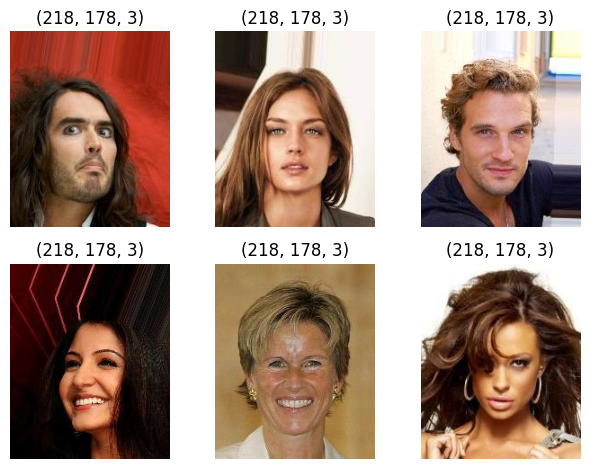

In [20]:
# Display Multiple Sample Images.
for i in range(0, 6):
    plt.subplot(2, 3, i+1)

    # Display Multiple Sample Images.
    img = cv2.imread(IMG_PATH + '/' + df["image_id"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display Image.
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis('off')

plt.tight_layout()
plt.show()

Gender
Female    12760
Male       9240
Name: count, dtype: int64


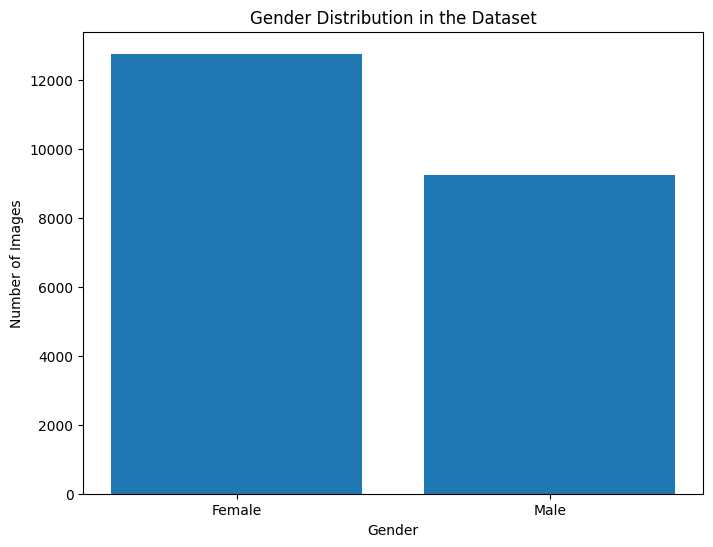

In [21]:
# prompt: # Get the category distribution.

# Get the category distribution.
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Visualize the category distribution (optional).
plt.figure(figsize=(8, 6))
plt.bar(gender_distribution.index, gender_distribution.values)
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Number of Images')
plt.show()

Gender
Female    12760
Male       9240
Name: count, dtype: int64
Gender
Female    9240
Male      9240
Name: count, dtype: int64


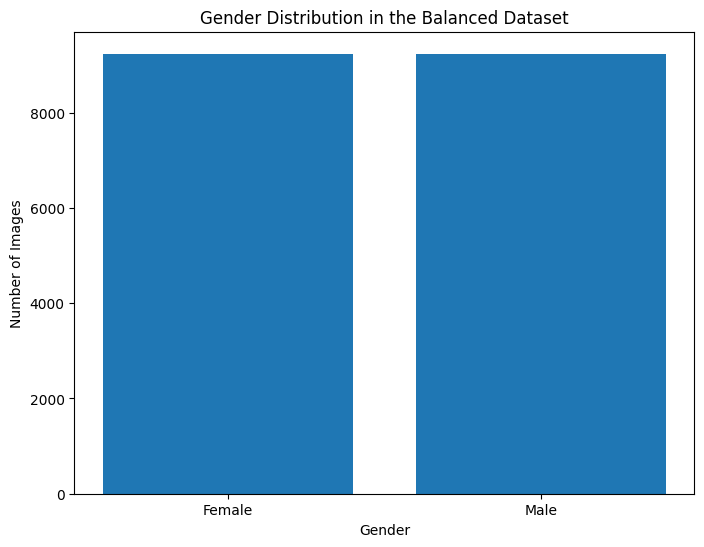

In [22]:
# prompt: buat distribution gender menjadi seimbang berdasarkan code diatas

# Get the category distribution.
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Calculate the minimum number of samples for each class
min_samples = min(gender_distribution)

# Create balanced datasets for each class
balanced_df = pd.DataFrame()
for gender in gender_distribution.index:
  temp_df = df[df['Gender'] == gender].sample(n=min_samples, random_state=42)
  balanced_df = pd.concat([balanced_df, temp_df])

# Reset the index of the balanced dataframe
balanced_df = balanced_df.reset_index(drop=True)


# Get the new category distribution.
new_gender_distribution = balanced_df['Gender'].value_counts()
print(new_gender_distribution)

# Visualize the new category distribution (optional).
plt.figure(figsize=(8, 6))
plt.bar(new_gender_distribution.index, new_gender_distribution.values)
plt.title('Gender Distribution in the Balanced Dataset')
plt.xlabel('Gender')
plt.ylabel('Number of Images')
plt.show()


df = balanced_df

<Axes: xlabel='Gender'>

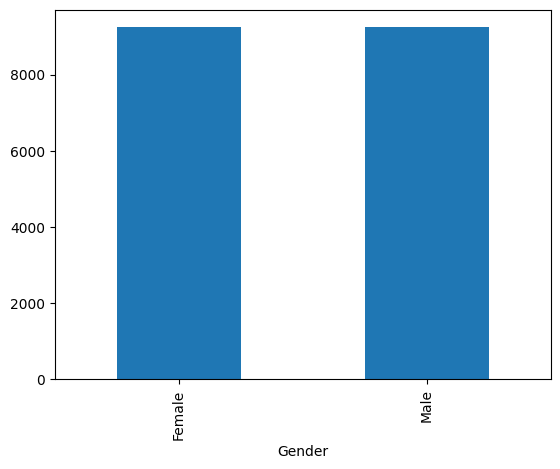

In [23]:
df["Gender"].value_counts().plot.bar()

In [24]:
train_df, test_df = train_test_split(df, test_size=0.3)
test_df, validation_df = train_test_split(test_df, test_size=0.33)

In [25]:
print("Total Train Sample Images : ", len(train_df))
print("Total Test Sample Images : ", len(test_df))
print("Total Validation Sample Images : ", len(validation_df))

Total Train Sample Images :  12936
Total Test Sample Images :  3714
Total Validation Sample Images :  1830


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3  # Import InceptionV3

# Define image size and batch size
IMAGE_SIZE = (299, 299)  # InceptionV3 input size
BATCH_SIZE = 32  # Set your batch size

# Load InceptionV3 preprocessing function
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Generate Train Images Data Generator with InceptionV3 preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create the train generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 12925 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 11 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  warnings.warn(


In [31]:
# prompt: # Generate Validation Images Data Generator with InceptionV3 preprocessing

# Generate Validation Images Data Generator with InceptionV3 preprocessing
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create the validation generator
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 1830 validated image filenames belonging to 2 classes.


In [50]:
# Generate Test Images Data Generator with InceptionV3 preprocessing
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Use InceptionV3 preprocessing
)

# Create the test generator
test_generator = test_gen.flow_from_dataframe(
    test_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col=None,  # No labels for test data
    class_mode=None,  # No class mode for test data
    target_size=(299, 299),  # Make sure target_size matches InceptionV3 input size
    batch_size=BATCH_SIZE,
    shuffle=False  # Set to False for test data to maintain order
)

Found 3709 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 5 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  warnings.warn(


In [51]:
import tensorflow as tf

# Load the InceptionV3 base model
base_googleNet_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Specify input shape explicitly

# Unfreeze the last few layers (you might need to adjust the number)
for layer in base_googleNet_model.layers[-30:]:  # Adjust the number of layers to unfreeze
    layer.trainable = True

# Optionally, freeze the rest of the layers if you want to fine-tune the model
for layer in base_googleNet_model.layers[:-30]:  # Adjust the number of layers to freeze
    layer.trainable = False

In [60]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMAGE_SIZE = (299, 299)
BATCH_SIZE = 16  # Reduce batch size to manage memory usage

# Load the InceptionV3 base model
base_googleNet_model = InceptionV3(weights='imagenet', include_top=False, input_shape=IMAGE_SIZE + (3,))

# Create the InceptionV3 model architecture
googleNet_model = Sequential(
    [
        base_googleNet_model,  # Use the InceptionV3 base model
        GlobalAveragePooling2D(),  # Pooling layer
        BatchNormalization(),  # Normalization layer
        Dense(256, activation='relu'),  # Fully connected layer with ReLU activation
        BatchNormalization(),  # Another normalization layer
        Dense(2, activation='softmax')  # Output layer for binary classification
    ]
)

# Compile the GoogLeNet model
base_learning_rate = 0.00001
googleNet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric for evaluation
)

In [63]:
# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

# Assuming 'validation_df' contains the validation data:
validation_generator = test_datagen.flow_from_dataframe(
    validation_df,  # Changed 'val_df' to 'validation_df'
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 12925 validated image filenames belonging to 2 classes.
Found 1830 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 11 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  warnings.warn(


In [64]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
earlystop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop training after 10 epochs with no improvement
    restore_best_weights=True  # Restore weights of the best epoch
)

# Learning rate reduction when a plateau is detected
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy for reducing the learning rate
    patience=4,              # Wait for 4 epochs with no improvement
    verbose=1,               # Print a message when learning rate is reduced
    factor=0.5,              # Reduce learning rate by half
    min_lr=0.0001            # Minimum learning rate to reach
)

# Combine callbacks
callbacks = [earlystop, learning_rate_reduction]


In [65]:
# prompt: # Train the GoogLeNet model

# Train the GoogLeNet model
epochs = 10  # Adjust the number of training epochs as needed

history = googleNet_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


808/808 ━━━━━━━━━━━━━━━━━━━━ 483s 480ms/step - accuracy: 0.8199 - loss: 0.4197 - val_accuracy: 0.9459 - val_loss: 0.1432 - learning_rate: 1.0000e-05
Epoch 2/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 376s 397ms/step - accuracy: 0.9263 - loss: 0.1834 - val_accuracy: 0.9585 - val_loss: 0.1193 - learning_rate: 1.0000e-05
Epoch 3/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 377s 390ms/step - accuracy: 0.9504 - loss: 0.1362 - val_accuracy: 0.9617 - val_loss: 0.1072 - learning_rate: 1.0000e-05
Epoch 4/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 321s 390ms/step - accuracy: 0.9555 - loss: 0.1125 - val_accuracy: 0.9634 - val_loss: 0.0981 - learning_rate: 1.0000e-05
Epoch 5/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 322s 389ms/step - accuracy: 0.9651 - loss: 0.0971 - val_accuracy: 0.9683 - val_loss: 0.0859 - learning_rate: 1.0000e-05
Epoch 6/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 322s 390ms/step - accuracy: 0.9715 - loss: 0.0772 - val_accuracy: 0.9656 - val_loss: 0.0879 - learning_rate: 1.0000e-05
Epoch 7/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 319s 392ms/

In [67]:
# Predict using the GoogLeNet model
googleNet_predict = googleNet_model.predict(test_generator, steps=int(np.ceil(len(test_df) / BATCH_SIZE)))

233/233 ━━━━━━━━━━━━━━━━━━━━ 28s 122ms/step


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [71]:
# Ensure prediction length matches the DataFrame length
predicted_length = len(googleNet_predict)
df_length = len(test_df)

# Slice the DataFrame to match prediction length if needed
if predicted_length != df_length:
    test_df = test_df.iloc[:predicted_length]

# Process the predictions
prediction = googleNet_predict.argmax(axis=-1)
test_df['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]


<ipython-input-71-666a2462d110>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]


In [72]:
test_df

,image_id,Gender,Prediction
13980,172413.jpg,Male,Female
18181,099660.jpg,Male,Female
7914,195811.jpg,Female,Female
18132,071074.jpg,Male,Male
12042,079538.jpg,Male,Female
...,...,...,...
8982,013836.jpg,Female,Female
7245,049842.jpg,Female,Male
5044,032728.jpg,Female,Female
4767,199047.jpg,Female,Male


In [73]:
labels = ['Male','Female']

cm = confusion_matrix(test_df['Gender'], test_df["Prediction"], labels= labels)
cm

array([[ 504, 1350],
       [ 477, 1378]])

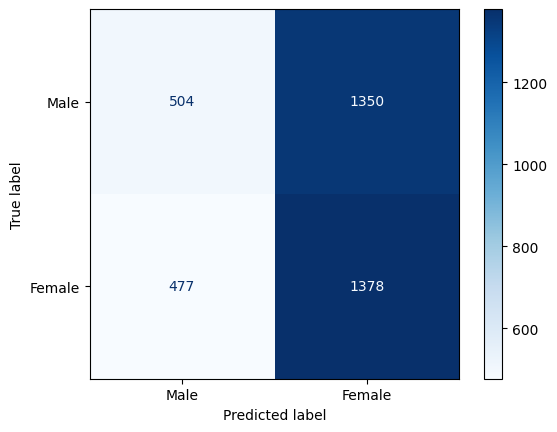

In [74]:
# prompt: untuk confusion matrix displaynya

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [75]:
# prompt: # Menghitung matriks confusion -> pada object 'cm_1' di atas
# # Membuat laporan klasifikasi
# # Membuat DataFrame dari matriks confusion
# # Membuat DataFrame dari laporan klasifikasi
# # Menampilkan tabel matriks evaluasi

from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Menghitung matriks confusion
cm_1 = confusion_matrix(test_df['Gender'], test_df["Prediction"], labels=labels)

# Membuat laporan klasifikasi
cr_1 = classification_report(test_df['Gender'], test_df["Prediction"], labels=labels)

# Membuat DataFrame dari matriks confusion
cm_df = pd.DataFrame(cm_1, index=labels, columns=labels)

# Membuat DataFrame dari laporan klasifikasi
cr_df = pd.DataFrame([classification_report(test_df['Gender'], test_df["Prediction"], labels=labels, output_dict=True)]).transpose()

# Menampilkan tabel matriks evaluasi
print("Matriks Confusion:")
print(cm_df)
print("\nLaporan Klasifikasi:")
print(cr_df)


Matriks Confusion:
        Male  Female
Male     504    1350
Female   477    1378

Laporan Klasifikasi:
                                                              0
Male          {'precision': 0.5137614678899083, 'recall': 0....
Female        {'precision': 0.5051319648093842, 'recall': 0....
accuracy                                               0.507414
macro avg     {'precision': 0.5094467163496462, 'recall': 0....
weighted avg  {'precision': 0.509445553030277, 'recall': 0.5...


In [76]:
print(classification_report(test_df['Gender'], test_df['Prediction'], target_names = ['Male', 'Female']))

              precision    recall  f1-score   support

        Male       0.51      0.74      0.60      1855
      Female       0.51      0.27      0.36      1854

    accuracy                           0.51      3709
   macro avg       0.51      0.51      0.48      3709
weighted avg       0.51      0.51      0.48      3709



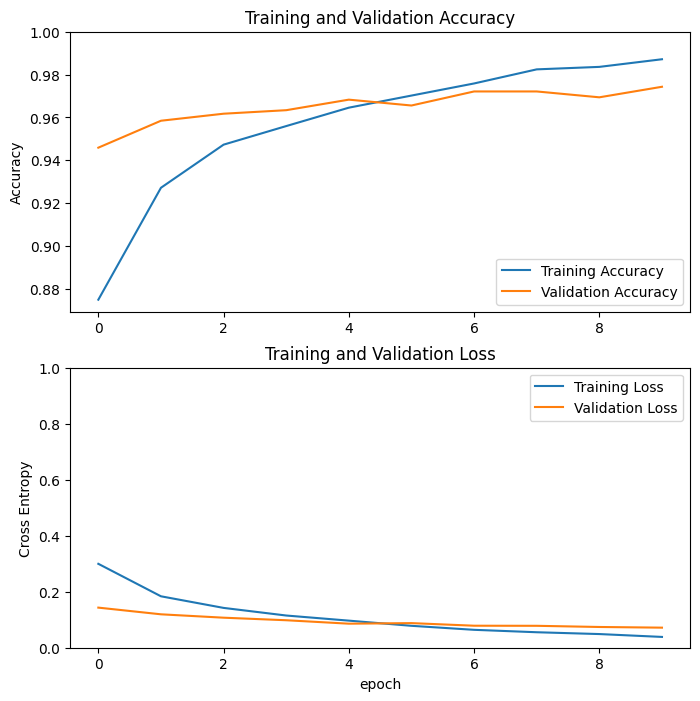

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Data yang salah prediksi (Male diprediksi sebagai Female):
         image_id Gender Prediction
13980  172413.jpg   Male     Female
18181  099660.jpg   Male     Female
12042  079538.jpg   Male     Female
13091  072616.jpg   Male     Female
14293  186474.jpg   Male     Female
...           ...    ...        ...
9439   053963.jpg   Male     Female
10203  144743.jpg   Male     Female
16144  075297.jpg   Male     Female
10962  155595.jpg   Male     Female
10915  058918.jpg   Male     Female

[1350 rows x 3 columns]


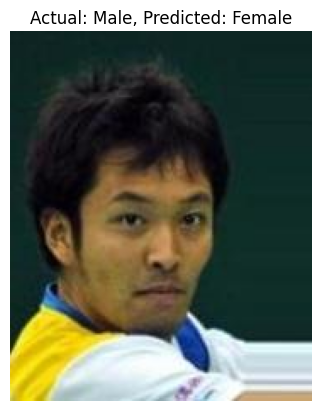

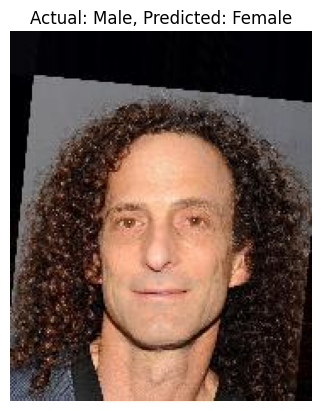

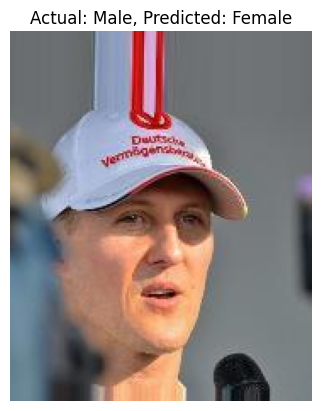

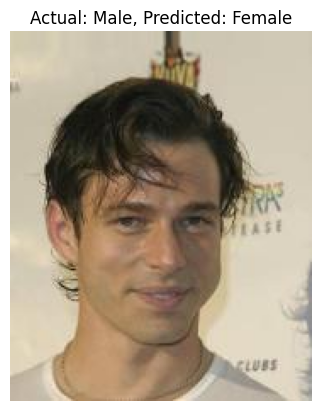

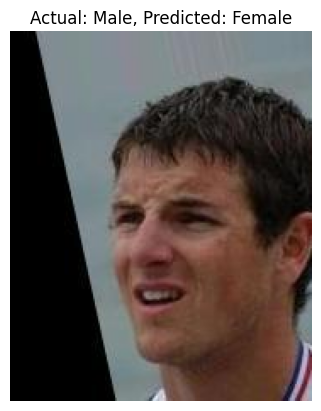

In [78]:
# prompt: # Menyiapkan Data yang Salah Prediksi
# # menyiapkan Data yang Male di Prediksi sebagai Female
# # tampilkan data yang salah dan berikan label aktual dan prediksi

# Menyiapkan Data yang Salah Prediksi
# menyiapkan Data yang Male di Prediksi sebagai Female
# tampilkan data yang salah dan berikan label aktual dan prediksi

import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Filter data yang salah prediksi (Male diprediksi sebagai Female)
wrong_predictions_df = test_df[(test_df['Gender'] == 'Male') & (test_df['Prediction'] == 'Female')]

# Tampilkan data yang salah prediksi beserta label aktual dan prediksi
print("Data yang salah prediksi (Male diprediksi sebagai Female):")
print(wrong_predictions_df[['image_id', 'Gender', 'Prediction']])

# Menampilkan contoh gambar yang salah prediksi
for i in range(min(5, len(wrong_predictions_df))):  # Menampilkan maksimal 5 contoh
    image_id = wrong_predictions_df['image_id'].iloc[i]
    actual_gender = wrong_predictions_df['Gender'].iloc[i]
    predicted_gender = wrong_predictions_df['Prediction'].iloc[i]

    img = cv2.imread(IMG_PATH + '/' + image_id)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"Actual: {actual_gender}, Predicted: {predicted_gender}")
    plt.axis('off')
    plt.show()

In [79]:
# prompt: # Menyiapkan Data yang Salah Prediksi
# # menyiapkan Data yang Male di Prediksi sebagai Female
# #dalam bentuk tabel

import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Menyiapkan Data yang Salah Prediksi
# menyiapkan Data yang Male di Prediksi sebagai Female
# dalam bentuk tabel

# Filter data yang salah prediksi (Male diprediksi sebagai Female)
wrong_predictions_df = test_df[(test_df['Gender'] == 'Male') & (test_df['Prediction'] == 'Female')]

# Tampilkan tabel data yang salah prediksi beserta label aktual dan prediksi
print("Data yang salah prediksi (Male diprediksi sebagai Female):")
print(wrong_predictions_df[['image_id', 'Gender', 'Prediction']])

Data yang salah prediksi (Male diprediksi sebagai Female):
         image_id Gender Prediction
13980  172413.jpg   Male     Female
18181  099660.jpg   Male     Female
12042  079538.jpg   Male     Female
13091  072616.jpg   Male     Female
14293  186474.jpg   Male     Female
...           ...    ...        ...
9439   053963.jpg   Male     Female
10203  144743.jpg   Male     Female
16144  075297.jpg   Male     Female
10962  155595.jpg   Male     Female
10915  058918.jpg   Male     Female

[1350 rows x 3 columns]


Data yang salah prediksi (Female diprediksi sebagai Male):
        image_id  Gender Prediction
4549  059143.jpg  Female       Male
5496  142829.jpg  Female       Male
7612  190641.jpg  Female       Male
7580  154778.jpg  Female       Male
4201  133400.jpg  Female       Male
...          ...     ...        ...
4143  198105.jpg  Female       Male
5282  170668.jpg  Female       Male
1890  151267.jpg  Female       Male
7245  049842.jpg  Female       Male
4767  199047.jpg  Female       Male

[477 rows x 3 columns]


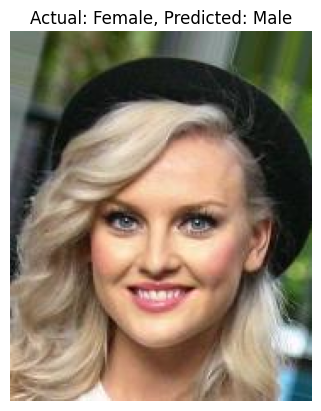

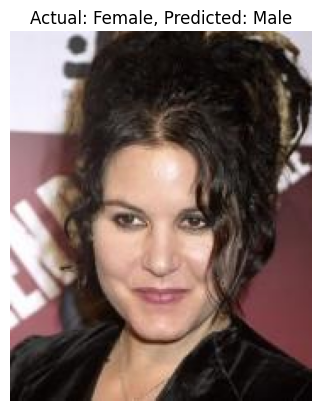

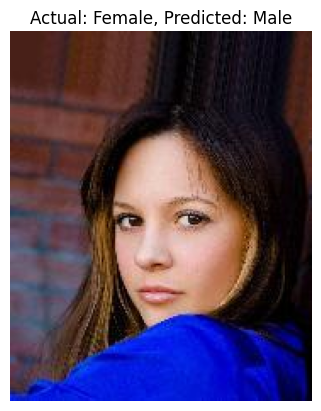

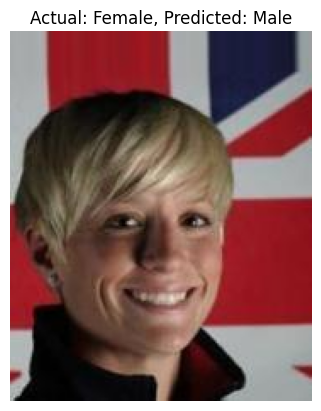

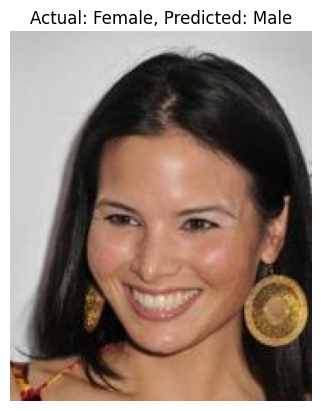

Data yang salah prediksi (Female diprediksi sebagai Male):
        image_id  Gender Prediction
4549  059143.jpg  Female       Male
5496  142829.jpg  Female       Male
7612  190641.jpg  Female       Male
7580  154778.jpg  Female       Male
4201  133400.jpg  Female       Male
...          ...     ...        ...
4143  198105.jpg  Female       Male
5282  170668.jpg  Female       Male
1890  151267.jpg  Female       Male
7245  049842.jpg  Female       Male
4767  199047.jpg  Female       Male

[477 rows x 3 columns]


In [80]:
# prompt: # Menyiapkan Data yang Salah Prediksi
# # menyiapkan Data yang Female di Prediksi sebagai male
# # tampilkan data yang salah dan berikan label aktual dan prediksi

# Menyiapkan Data yang Salah Prediksi
# menyiapkan Data yang Female di Prediksi sebagai male
# tampilkan data yang salah dan berikan label aktual dan prediksi

# Filter data yang salah prediksi (Female diprediksi sebagai Male)
wrong_predictions_df = test_df[(test_df['Gender'] == 'Female') & (test_df['Prediction'] == 'Male')]

# Tampilkan data yang salah prediksi beserta label aktual dan prediksi
print("Data yang salah prediksi (Female diprediksi sebagai Male):")
print(wrong_predictions_df[['image_id', 'Gender', 'Prediction']])

# Menampilkan contoh gambar yang salah prediksi
for i in range(min(5, len(wrong_predictions_df))):  # Menampilkan maksimal 5 contoh
    image_id = wrong_predictions_df['image_id'].iloc[i]
    actual_gender = wrong_predictions_df['Gender'].iloc[i]
    predicted_gender = wrong_predictions_df['Prediction'].iloc[i]

    img = cv2.imread(IMG_PATH + '/' + image_id)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"Actual: {actual_gender}, Predicted: {predicted_gender}")
    plt.axis('off')
    plt.show()

# Menyiapkan Data yang Salah Prediksi
# menyiapkan Data yang Female di Prediksi sebagai Male
# dalam bentuk tabel

# Filter data yang salah prediksi (Female diprediksi sebagai Male)
wrong_predictions_df = test_df[(test_df['Gender'] == 'Female') & (test_df['Prediction'] == 'Male')]

# Tampilkan tabel data yang salah prediksi beserta label aktual dan prediksi
print("Data yang salah prediksi (Female diprediksi sebagai Male):")
print(wrong_predictions_df[['image_id', 'Gender', 'Prediction']])

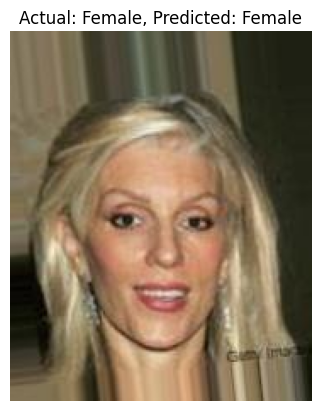

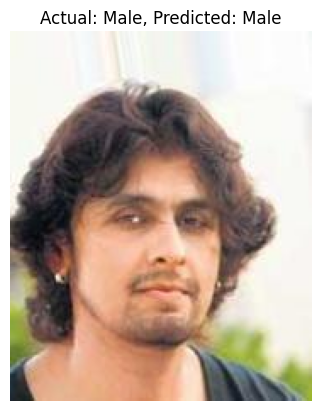

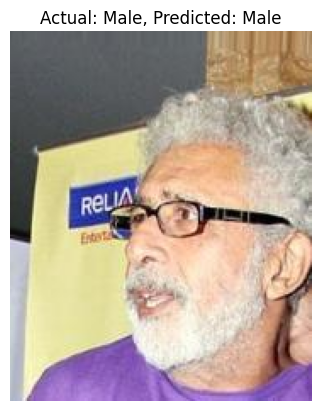

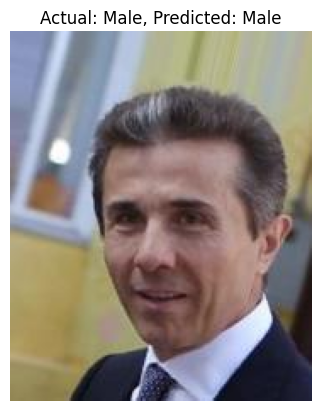

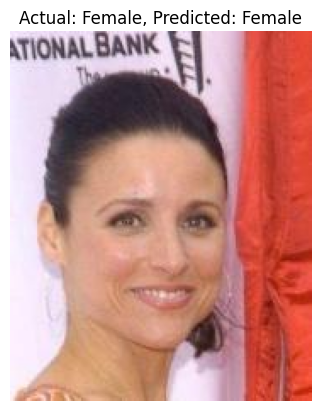

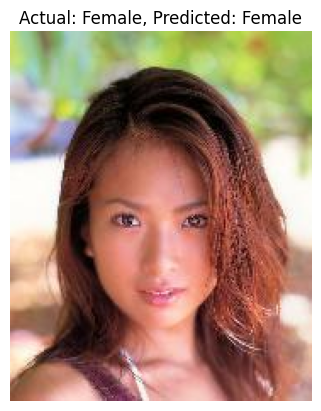

In [81]:
# prompt: tampilkan result yang aktual dan prediksi gambarnya benar tampilkan 15 gambar dan beri label

# Menampilkan 15 contoh gambar yang prediksinya benar dengan label aktual dan prediksi
for i in range(min(15, len(test_df))):
    image_id = test_df['image_id'].iloc[i]
    actual_gender = test_df['Gender'].iloc[i]
    predicted_gender = test_df['Prediction'].iloc[i]

    if actual_gender == predicted_gender:  # Hanya tampilkan jika prediksi benar
        img = cv2.imread(IMG_PATH + '/' + image_id)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.title(f"Actual: {actual_gender}, Predicted: {predicted_gender}")
        plt.axis('off')
        plt.show()

In [82]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

final_train_accuracy = accuracy[-1]
final_val_accuracy = val_accuracy[-1]

print(f"Final Training Accuracy: {final_train_accuracy:.2%}")
print(f"Final Validation Accuracy: {final_val_accuracy:.2%}")

Final Training Accuracy: 98.72%
Final Validation Accuracy: 97.43%
